In [ ]:
import os
import tempfile
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# !pip install category_encoders

In [ ]:
from category_encoders import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Model and performance evaluation
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
lbl = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support as score
# Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval

In [ ]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Crossroads/engg_data/crossroads_full_feature_set.csv")

In [ ]:
df.head()

,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,price_code,PC1,Price,paid,add_datetime,class_name,status,Sales_Source,isHost,SeatType,TicketClass,Start Year,LastYear,Term,TicketType,SeatUniqueID,Season,ClubExpYear,Tenure,UniqueID,isAttended,Resold,ResalePrice,ResaleDate,isSTM,acct_type_group,plan_event_name_group,row_name_group,seat_nums_group,section_names_group,Zone,comp_names_group,price_group,PC1_group,class_name_grp,ticket_class_grp,TicketType_group,no_days_prebooked,gameday_minus_start_year,lastyear_minus_gameday,section_group,section_group_segment,section_name_segment,row_segment,seat_segment,Game_Type,Week,week_day,Game Time,Home Points,Away Points,unemployment_rate,covid_cases,Avg_Day_Temp,Precipitation,Avg_Dew_Point,weekend_flag
0,117948790,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,1,FR,F,111.0,Y,2021-03-31 16:08:52,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-1,2021,NaN,25.0,CLT21HOU-101-10-1,Yes,NaN,NaN,NaN,NaN,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,NaN,NaN,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1
1,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,10,FR,F,111.0,Y,2021-03-31 16:08:19,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-10,2021,NaN,20.0,CLT21HOU-101-10-10,No,NaN,NaN,NaN,NaN,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,NaN,NaN,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1
2,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,11,FR,F,111.0,Y,2021-03-31 16:08:19,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-11,2021,NaN,20.0,CLT21HOU-101-10-11,No,NaN,NaN,NaN,NaN,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,NaN,NaN,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1
3,1489599590,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,12,FR,F,111.0,Y,2021-03-31 16:10:20,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-12,2021,NaN,4.0,CLT21HOU-101-10-12,Yes,NaN,NaN,NaN,NaN,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,NaN,NaN,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1
4,115101990,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,13,FR,F,111.0,Y,2021-03-31 16:08:21,OPEN,SOLD,NaN,0,GA,Manifest,NaN,NaN,NaN,Renewal,101-10-13,2021,NaN,32.0,CLT21HOU-101-10-13,No,NaN,NaN,NaN,NaN,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,NaN,NaN,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1


Text(0, 0.5, 'Price')

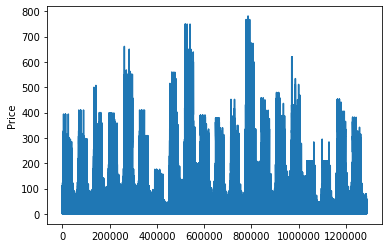

In [ ]:
fig, ax = plt.subplots()
plt.plot(df["Price"])
ax.ticklabel_format(style='plain', useOffset=False)
plt.ylabel("Price")


(array([6.16540e+04, 1.05799e+05, 2.03357e+05, 2.00583e+05, 1.84285e+05,
        1.40261e+05, 8.44630e+04, 8.89880e+04, 5.91350e+04, 1.80600e+04,
        1.16120e+04, 1.31680e+04, 2.54240e+04, 3.06460e+04, 1.89160e+04,
        1.61750e+04, 5.05200e+03, 5.41300e+03, 4.04800e+03, 2.14800e+03,
        2.26800e+03, 9.55000e+02, 2.05900e+03, 1.56200e+03, 7.82000e+02,
        1.10000e+01, 1.80000e+01, 2.00000e+00, 1.50000e+01, 2.10000e+01,
        7.00000e+00, 0.00000e+00, 4.00000e+00, 5.00000e+00, 2.00000e+01]),
 array([  0.        ,  22.28571429,  44.57142857,  66.85714286,
         89.14285714, 111.42857143, 133.71428571, 156.        ,
        178.28571429, 200.57142857, 222.85714286, 245.14285714,
        267.42857143, 289.71428571, 312.        , 334.28571429,
        356.57142857, 378.85714286, 401.14285714, 423.42857143,
        445.71428571, 468.        , 490.28571429, 512.57142857,
        534.85714286, 557.14285714, 579.42857143, 601.71428571,
        624.        , 646.28571429, 668

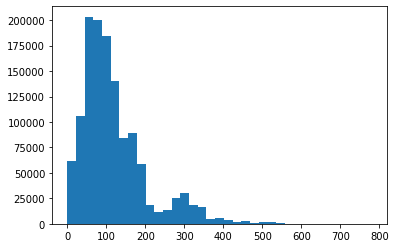

In [ ]:
plt.hist(df["Price"], bins=35)

In [ ]:
df.isnull().sum()

acct_id                           0
acct_type_desc                91418
event_name                        0
event_date                        0
plan_event_name              279172
comp_name                     80644
section_name                      0
row_name                          0
SeatNum                           0
price_code                        0
PC1                               0
Price                             0
paid                         154145
add_datetime                  80644
class_name                        0
status                            0
Sales_Source                1280704
isHost                            0
SeatType                          0
TicketClass                       0
Start Year                  1146325
LastYear                    1146325
Term                        1146445
TicketType                        0
SeatUniqueID                      0
Season                            0
ClubExpYear                 1146325
Tenure                      

In [ ]:
df["isSTM"].unique()

array([nan,  1.])

In [ ]:
def combine_vals(row):
  if row["Resold"] in [1.0, '1', 'Yes']:
    return 1
  else:
    return 0

df["Resold"] = df.apply(lambda x: combine_vals(x), 1)

In [ ]:
df[["acct_type_desc"]] = df[["acct_type_desc"]].fillna("NA")
df[["acct_type_group"]] = df[["acct_type_group"]].fillna("NA")
df[["plan_event_name"]] = df[["plan_event_name"]].fillna("NA")
df[["plan_event_name_group"]] = df[["plan_event_name_group"]].fillna("NA")
df[["Sales_Source"]] = df[["Sales_Source"]].fillna("NA")
df[["Zone"]] = df[["Zone"]].fillna("NA")
df[["comp_name"]] = df[["comp_name"]].fillna("NA")
df[["comp_names_group"]] = df[["comp_names_group"]].fillna("NA")
df[["class_name_grp"]] = df[["class_name_grp"]].fillna("NA")
df[["paid"]] = df[["paid"]].fillna("NA")
df[["gameday_minus_start_year"]] = df[["gameday_minus_start_year"]].fillna(-1)
df[["lastyear_minus_gameday"]] = df[["lastyear_minus_gameday"]].fillna(-1000)
df[["unemployment_rate"]] = df[["unemployment_rate"]].fillna(-1)
df[["no_days_prebooked"]] = df[["no_days_prebooked"]].fillna(-1000)
df[["Term"]] = df[["Term"]].fillna(-1)
df[["Tenure"]] = df[["Tenure"]].fillna(-1)
df[["ResalePrice"]] = df[["ResalePrice"]].fillna(-1)
df[["isSTM"]] = df[["isSTM"]].fillna(0)
df["isSTM"] = df["isSTM"].astype(int)


In [ ]:
def pivot(train_data, group_cols, agg_col):
    data = train_data.groupby(group_cols).agg({agg_col: "count"}).reset_index()
    data = pd.pivot_table(data, values=agg_col, index=[group_cols[0]], columns=[group_cols[1]], aggfunc=np.sum).reset_index().rename_axis(None, axis=1)
    data = data.fillna(0)
    data["count"] = data["Yes"] + data["No"]
    data["%Attended"] = 100*data["Yes"]/(data["Yes"]+data["No"])
    return data

In [ ]:
accnt_type_df = pivot(df, ["acct_id", "isAttended"], "UniqueID")
accnt_type_df.head()

,acct_id,???,No,Yes,count,%Attended
0,190,6467.0,68700.0,369.0,69069.0,0.534248
1,14999990,0.0,8.0,0.0,8.0,0.000000
2,16999990,0.0,1.0,0.0,1.0,0.000000
3,110002390,14.0,29.0,97.0,126.0,76.984127
4,110003490,20.0,25.0,135.0,160.0,84.375000


In [ ]:
temp = df[df["isAttended"]!="???"]
acct_count_df = temp.groupby("acct_id").agg({"event_name": "nunique"}).reset_index()
acct_count_df = acct_count_df.rename(columns={"event_name": "event_name_count"})
acct_count_df.head()

,acct_id,event_name_count
0,190,18
1,14999990,2
2,16999990,1
3,110002390,18
4,110003490,16


In [ ]:
df = df.merge(accnt_type_df[["acct_id", "count", "%Attended"]], on="acct_id", how="left")
df = df.merge(acct_count_df[["acct_id", "event_name_count"]], on="acct_id", how="left")

In [ ]:
df["%Attended"] = df["%Attended"].fillna(-1)
df["event_name_count"] = df["event_name_count"].fillna(-1)

In [ ]:
df.head()

,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,price_code,PC1,Price,paid,add_datetime,class_name,status,Sales_Source,isHost,SeatType,TicketClass,Start Year,LastYear,Term,TicketType,SeatUniqueID,Season,ClubExpYear,Tenure,UniqueID,isAttended,Resold,ResalePrice,ResaleDate,isSTM,acct_type_group,plan_event_name_group,row_name_group,seat_nums_group,section_names_group,Zone,comp_names_group,price_group,PC1_group,class_name_grp,ticket_class_grp,TicketType_group,no_days_prebooked,gameday_minus_start_year,lastyear_minus_gameday,section_group,section_group_segment,section_name_segment,row_segment,seat_segment,Game_Type,Week,week_day,Game Time,Home Points,Away Points,unemployment_rate,covid_cases,Avg_Day_Temp,Precipitation,Avg_Dew_Point,weekend_flag,count,%Attended,event_name_count
0,117948790,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,1,FR,F,111.0,Y,2021-03-31 16:08:52,OPEN,SOLD,NA,0,GA,Manifest,NaN,NaN,-1.0,Renewal,101-10-1,2021,NaN,25.0,CLT21HOU-101-10-1,Yes,0,-1.0,NaN,0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,-1.0,-1000.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1,54.0,94.444444,18.0
1,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,10,FR,F,111.0,Y,2021-03-31 16:08:19,OPEN,SOLD,NA,0,GA,Manifest,NaN,NaN,-1.0,Renewal,101-10-10,2021,NaN,20.0,CLT21HOU-101-10-10,No,0,-1.0,NaN,0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,-1.0,-1000.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1,72.0,70.833333,18.0
2,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,11,FR,F,111.0,Y,2021-03-31 16:08:19,OPEN,SOLD,NA,0,GA,Manifest,NaN,NaN,-1.0,Renewal,101-10-11,2021,NaN,20.0,CLT21HOU-101-10-11,No,0,-1.0,NaN,0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,-1.0,-1000.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1,72.0,70.833333,18.0
3,1489599590,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,12,FR,F,111.0,Y,2021-03-31 16:10:20,OPEN,SOLD,NA,0,GA,Manifest,NaN,NaN,-1.0,Renewal,101-10-12,2021,NaN,4.0,CLT21HOU-101-10-12,Yes,0,-1.0,NaN,0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,-1.0,-1000.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1,18.0,83.333333,18.0
4,115101990,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,13,FR,F,111.0,Y,2021-03-31 16:08:21,OPEN,SOLD,NA,0,GA,Manifest,NaN,NaN,-1.0,Renewal,101-10-13,2021,NaN,32.0,CLT21HOU-101-10-13,No,0,-1.0,NaN,0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,-1.0,-1000.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1,144.0,72.222222,18.0


In [ ]:
df.isnull().sum()["%Attended"]

0

In [ ]:
t0 = df[(df["isAttended"]=="???") & (df["%Attended"]<21) & (df["count"]>=10) & (df["event_name_count"]>2)]
t0.shape, t0.acct_id.nunique()

((7128, 69), 96)

In [ ]:
t = df[df["isAttended"]=="???"]
t.shape, t.acct_id.nunique()

((128688, 69), 22102)

In [ ]:
100.0*7128/128688

5.538977993286087

In [ ]:
att  = df["isAttended"].values
df = df.drop("isAttended", 1)
df["isAttended"] = att

In [ ]:
df.head()

,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,price_code,PC1,Price,paid,add_datetime,class_name,status,Sales_Source,isHost,SeatType,TicketClass,Start Year,LastYear,Term,TicketType,SeatUniqueID,Season,ClubExpYear,Tenure,UniqueID,Resold,ResalePrice,ResaleDate,isSTM,acct_type_group,plan_event_name_group,row_name_group,seat_nums_group,section_names_group,Zone,comp_names_group,price_group,PC1_group,class_name_grp,ticket_class_grp,TicketType_group,no_days_prebooked,gameday_minus_start_year,lastyear_minus_gameday,section_group,section_group_segment,section_name_segment,row_segment,seat_segment,Game_Type,Week,week_day,Game Time,Home Points,Away Points,unemployment_rate,covid_cases,Avg_Day_Temp,Precipitation,Avg_Dew_Point,weekend_flag,count,%Attended,event_name_count,isAttended
0,117948790,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,1,FR,F,111.0,Y,2021-03-31 16:08:52,OPEN,SOLD,NA,0,GA,Manifest,NaN,NaN,-1.0,Renewal,101-10-1,2021,NaN,25.0,CLT21HOU-101-10-1,0,-1.0,NaN,0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,-1.0,-1000.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1,54.0,94.444444,18.0,Yes
1,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,10,FR,F,111.0,Y,2021-03-31 16:08:19,OPEN,SOLD,NA,0,GA,Manifest,NaN,NaN,-1.0,Renewal,101-10-10,2021,NaN,20.0,CLT21HOU-101-10-10,0,-1.0,NaN,0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,-1.0,-1000.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1,72.0,70.833333,18.0,No
2,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,11,FR,F,111.0,Y,2021-03-31 16:08:19,OPEN,SOLD,NA,0,GA,Manifest,NaN,NaN,-1.0,Renewal,101-10-11,2021,NaN,20.0,CLT21HOU-101-10-11,0,-1.0,NaN,0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,-1.0,-1000.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1,72.0,70.833333,18.0,No
3,1489599590,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,12,FR,F,111.0,Y,2021-03-31 16:10:20,OPEN,SOLD,NA,0,GA,Manifest,NaN,NaN,-1.0,Renewal,101-10-12,2021,NaN,4.0,CLT21HOU-101-10-12,0,-1.0,NaN,0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,-1.0,-1000.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1,18.0,83.333333,18.0,Yes
4,115101990,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,13,FR,F,111.0,Y,2021-03-31 16:08:21,OPEN,SOLD,NA,0,GA,Manifest,NaN,NaN,-1.0,Renewal,101-10-13,2021,NaN,32.0,CLT21HOU-101-10-13,0,-1.0,NaN,0,G1,G1,G1,G1,G1,N,G1,price_group_3,PC1_group_2,class_name_2,ticket_class_1,group_0,199.4,-1.0,-1000.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,13:00,108,89,2.5,184.4,52.12,0.0,39.62,1,144.0,72.222222,18.0,No


In [ ]:
# df[["event_name", "event_date"]].drop_duplicates().sort_values("event_date").reset_index(drop=True)

In [ ]:
df = df.drop(["acct_id", "event_date", "section_name", "row_name", "SeatNum", "Game Time", 
              "add_datetime", "Start Year", "LastYear", "SeatUniqueID", "ResaleDate", 
              "ClubExpYear"], 1)


In [ ]:
df["Season"] = df["Season"].astype(str)

In [ ]:
def label_encode(row, col):
  if row[col]=="Yes":
    return 1
  elif row[col]=="No":
    return 0
  else:
    return row[col]

df["isAttended"] = df.apply(lambda x: label_encode(x, "isAttended"), 1)

In [ ]:
df.shape

(1286916, 57)

In [ ]:
df = df.drop(["PC1_group", "lastyear_minus_gameday", "SeatType", "status", "Precipitation", "ticket_class_grp"], 1)

In [ ]:
cat_cols = []
for k,v in dict(df.dtypes).items():
  if v=="object":
    cat_cols.append(k)

cat_cols = list(set(cat_cols) - set(["event_name", "UniqueID", "isAttended"]))

from pandas.core.indexes import category
for col in cat_cols:
  df[col] = df[col].astype("category")

In [ ]:
# cat_cols

In [ ]:
df.head()

,acct_type_desc,event_name,plan_event_name,comp_name,price_code,PC1,Price,paid,class_name,Sales_Source,isHost,TicketClass,Term,TicketType,Season,Tenure,UniqueID,Resold,ResalePrice,isSTM,acct_type_group,plan_event_name_group,row_name_group,seat_nums_group,section_names_group,Zone,comp_names_group,price_group,class_name_grp,TicketType_group,no_days_prebooked,gameday_minus_start_year,section_group,section_group_segment,section_name_segment,row_segment,seat_segment,Game_Type,Week,week_day,Home Points,Away Points,unemployment_rate,covid_cases,Avg_Day_Temp,Avg_Dew_Point,weekend_flag,count,%Attended,event_name_count,isAttended
0,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,25.0,CLT21HOU-101-10-1,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,54.0,94.444444,18.0,1
1,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,20.0,CLT21HOU-101-10-10,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,72.0,70.833333,18.0,0
2,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,20.0,CLT21HOU-101-10-11,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,72.0,70.833333,18.0,0
3,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,4.0,CLT21HOU-101-10-12,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,18.0,83.333333,18.0,1
4,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,32.0,CLT21HOU-101-10-13,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,144.0,72.222222,18.0,0


In [ ]:
train_df = df[df["isAttended"]!="???"]
test_df = df[df["isAttended"]=="???"]

In [ ]:
val_data = pd.read_csv("/content/drive/MyDrive/Crossroads/Ensemble_Model/Ensemble_Validation_DataSet_v1")
val_data = val_data.drop("Unnamed: 0", 1)
val_df = train_df[train_df["UniqueID"].isin(val_data["UniqueID"].values.tolist())]

In [ ]:
val_df.head()

,acct_type_desc,event_name,plan_event_name,comp_name,price_code,PC1,Price,paid,class_name,Sales_Source,isHost,TicketClass,Term,TicketType,Season,Tenure,UniqueID,Resold,ResalePrice,isSTM,acct_type_group,plan_event_name_group,row_name_group,seat_nums_group,section_names_group,Zone,comp_names_group,price_group,class_name_grp,TicketType_group,no_days_prebooked,gameday_minus_start_year,section_group,section_group_segment,section_name_segment,row_segment,seat_segment,Game_Type,Week,week_day,Home Points,Away Points,unemployment_rate,covid_cases,Avg_Day_Temp,Avg_Dew_Point,weekend_flag,count,%Attended,event_name_count,isAttended
4,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,32.0,CLT21HOU-101-10-13,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,144.0,72.222222,18.0,0
5,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,32.0,CLT21HOU-101-10-14,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,144.0,72.222222,18.0,1
8,Employee,CLT21HOU,21FS,Front Office/Club Staff,FR,F,0.0,Y,OPEN,NA,0,Manifest,-1.0,Comp,2021,7.0,CLT21HOU-101-10-17,0,-1.0,0,G2,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_1,179.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,43.0,95.348837,18.0,1
17,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,38.0,CLT21HOU-101-10-5,1,72.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,204.0,93.627451,18.0,1
18,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,30.0,CLT21HOU-101-10-6,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,54.0,79.629630,18.0,1


In [ ]:
train_df.groupby("section_group").agg({"%Attended": "mean"}).reset_index()

,section_group,%Attended
0,1.0,81.541803
1,2.0,82.764118
2,3.0,81.186920
3,4.0,73.552472
4,5.0,81.307226
5,6.0,73.161952


In [ ]:
train_df = train_df[~train_df["UniqueID"].isin(val_df["UniqueID"].values.tolist())]

In [ ]:
train_df.shape, val_df.shape

((926582, 51), (231646, 51))

In [ ]:
val_df.head()

,acct_type_desc,event_name,plan_event_name,comp_name,price_code,PC1,Price,paid,class_name,Sales_Source,isHost,TicketClass,Term,TicketType,Season,Tenure,UniqueID,Resold,ResalePrice,isSTM,acct_type_group,plan_event_name_group,row_name_group,seat_nums_group,section_names_group,Zone,comp_names_group,price_group,class_name_grp,TicketType_group,no_days_prebooked,gameday_minus_start_year,section_group,section_group_segment,section_name_segment,row_segment,seat_segment,Game_Type,Week,week_day,Home Points,Away Points,unemployment_rate,covid_cases,Avg_Day_Temp,Avg_Dew_Point,weekend_flag,count,%Attended,event_name_count,isAttended
4,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,32.0,CLT21HOU-101-10-13,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,144.0,72.222222,18.0,0
5,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,32.0,CLT21HOU-101-10-14,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,144.0,72.222222,18.0,1
8,Employee,CLT21HOU,21FS,Front Office/Club Staff,FR,F,0.0,Y,OPEN,NA,0,Manifest,-1.0,Comp,2021,7.0,CLT21HOU-101-10-17,0,-1.0,0,G2,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_1,179.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,43.0,95.348837,18.0,1
17,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,38.0,CLT21HOU-101-10-5,1,72.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,204.0,93.627451,18.0,1
18,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,30.0,CLT21HOU-101-10-6,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,54.0,79.629630,18.0,1


In [ ]:
train_cnt = train_df["count"].values
train_att = train_df["%Attended"].values
train_event_cnt = train_df["event_name_count"].values

val_cnt = val_df["count"].values
val_att = val_df["%Attended"].values
val_event_cnt = val_df["event_name_count"].values

test_cnt = test_df["count"].values
test_att = test_df["%Attended"].values
test_event_cnt = test_df["event_name_count"].values

In [ ]:
train_df = train_df.drop(["count", "%Attended", "event_name_count"], 1)
val_df = val_df.drop(["count", "%Attended", "event_name_count"], 1)
test_df = test_df.drop(["count", "%Attended", "event_name_count"], 1)

In [ ]:
train_df.head()

,acct_type_desc,event_name,plan_event_name,comp_name,price_code,PC1,Price,paid,class_name,Sales_Source,isHost,TicketClass,Term,TicketType,Season,Tenure,UniqueID,Resold,ResalePrice,isSTM,acct_type_group,plan_event_name_group,row_name_group,seat_nums_group,section_names_group,Zone,comp_names_group,price_group,class_name_grp,TicketType_group,no_days_prebooked,gameday_minus_start_year,section_group,section_group_segment,section_name_segment,row_segment,seat_segment,Game_Type,Week,week_day,Home Points,Away Points,unemployment_rate,covid_cases,Avg_Day_Temp,Avg_Dew_Point,weekend_flag,isAttended
0,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,25.0,CLT21HOU-101-10-1,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,1
1,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,20.0,CLT21HOU-101-10-10,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,0
2,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,20.0,CLT21HOU-101-10-11,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,0
3,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,4.0,CLT21HOU-101-10-12,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,1
6,Season,CLT21HOU,21FS,Not Comp,FR,F,111.0,Y,OPEN,NA,0,Manifest,-1.0,Renewal,2021,32.0,CLT21HOU-101-10-15,0,-1.0,0,G1,G1,G1,G1,G1,N,G1,price_group_3,class_name_2,group_0,199.4,-1.0,1.0,Low,Low,Low,Low,Reg,6,Sunday,108,89,2.5,184.4,52.12,39.62,1,0


In [ ]:
test_df["isAttended"].unique()

array(['???'], dtype=object)

In [ ]:
train_df.shape, val_df.shape, test_df.shape

((926582, 48), (231646, 48), (128688, 48))

In [ ]:
train_df["event_name"].nunique(), val_df["event_name"].nunique(), test_df["event_name"].nunique()

(18, 18, 2)

In [ ]:
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1].values
X_val = val_df.iloc[:, :-1]
y_val = val_df.iloc[:, -1].values
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1].values

In [ ]:
enc = TargetEncoder(cols=cat_cols, min_samples_leaf=20, smoothing=10).fit(X_train, y_train)
X_train_encoded = enc.transform(X_train)
X_val_encoded = enc.transform(X_val)
X_test_encoded = enc.transform(X_test)

In [ ]:
X_train_encoded.head()

,acct_type_desc,event_name,plan_event_name,comp_name,price_code,PC1,Price,paid,class_name,Sales_Source,isHost,TicketClass,Term,TicketType,Season,Tenure,UniqueID,Resold,ResalePrice,isSTM,acct_type_group,plan_event_name_group,row_name_group,seat_nums_group,section_names_group,Zone,comp_names_group,price_group,class_name_grp,TicketType_group,no_days_prebooked,gameday_minus_start_year,section_group,section_group_segment,section_name_segment,row_segment,seat_segment,Game_Type,Week,week_day,Home Points,Away Points,unemployment_rate,covid_cases,Avg_Day_Temp,Avg_Dew_Point,weekend_flag
0,0.847217,CLT21HOU,0.831096,0.841971,0.856563,0.846325,111.0,0.83152,0.828021,0.777401,0,0.799824,-1.0,0.848955,0.752518,25.0,CLT21HOU-101-10-1,0,-1.0,0,0.845861,0.833541,0.801652,0.78405,0.814664,0.754976,0.840094,0.841979,0.833235,0.843415,199.4,-1.0,1.0,0.67198,0.684206,0.677035,0.680039,0.817374,6,0.782799,108,89,2.5,184.4,52.12,39.62,1
1,0.847217,CLT21HOU,0.831096,0.841971,0.856563,0.846325,111.0,0.83152,0.828021,0.777401,0,0.799824,-1.0,0.848955,0.752518,20.0,CLT21HOU-101-10-10,0,-1.0,0,0.845861,0.833541,0.801652,0.78405,0.814664,0.754976,0.840094,0.841979,0.833235,0.843415,199.4,-1.0,1.0,0.67198,0.684206,0.677035,0.680039,0.817374,6,0.782799,108,89,2.5,184.4,52.12,39.62,1
2,0.847217,CLT21HOU,0.831096,0.841971,0.856563,0.846325,111.0,0.83152,0.828021,0.777401,0,0.799824,-1.0,0.848955,0.752518,20.0,CLT21HOU-101-10-11,0,-1.0,0,0.845861,0.833541,0.801652,0.78405,0.814664,0.754976,0.840094,0.841979,0.833235,0.843415,199.4,-1.0,1.0,0.67198,0.684206,0.677035,0.680039,0.817374,6,0.782799,108,89,2.5,184.4,52.12,39.62,1
3,0.847217,CLT21HOU,0.831096,0.841971,0.856563,0.846325,111.0,0.83152,0.828021,0.777401,0,0.799824,-1.0,0.848955,0.752518,4.0,CLT21HOU-101-10-12,0,-1.0,0,0.845861,0.833541,0.801652,0.78405,0.814664,0.754976,0.840094,0.841979,0.833235,0.843415,199.4,-1.0,1.0,0.67198,0.684206,0.677035,0.680039,0.817374,6,0.782799,108,89,2.5,184.4,52.12,39.62,1
6,0.847217,CLT21HOU,0.831096,0.841971,0.856563,0.846325,111.0,0.83152,0.828021,0.777401,0,0.799824,-1.0,0.848955,0.752518,32.0,CLT21HOU-101-10-15,0,-1.0,0,0.845861,0.833541,0.801652,0.78405,0.814664,0.754976,0.840094,0.841979,0.833235,0.843415,199.4,-1.0,1.0,0.67198,0.684206,0.677035,0.680039,0.817374,6,0.782799,108,89,2.5,184.4,52.12,39.62,1


In [ ]:
train_ids = X_train["UniqueID"].values
val_ids = X_val["UniqueID"].values
test_ids = X_test["UniqueID"].values

X_train = X_train.drop(["UniqueID", "event_name"], 1)
X_val = X_val.drop(["UniqueID", "event_name"], 1)
X_test = X_test.drop(["UniqueID", "event_name"], 1)

In [ ]:
train_ids = X_train_encoded["UniqueID"].values
val_ids = X_val_encoded["UniqueID"].values
test_ids = X_test_encoded["UniqueID"].values

X_train_encoded = X_train_encoded.drop(["UniqueID", "event_name"], 1)
X_val_encoded = X_val_encoded.drop(["UniqueID", "event_name"], 1)
X_test_encoded = X_test_encoded.drop(["UniqueID", "event_name"], 1)

In [ ]:
X_train_encoded.head()

,acct_type_desc,plan_event_name,comp_name,price_code,PC1,Price,paid,class_name,Sales_Source,isHost,TicketClass,Term,TicketType,Season,Tenure,Resold,ResalePrice,isSTM,acct_type_group,plan_event_name_group,row_name_group,seat_nums_group,section_names_group,Zone,comp_names_group,price_group,class_name_grp,TicketType_group,no_days_prebooked,gameday_minus_start_year,section_group,section_group_segment,section_name_segment,row_segment,seat_segment,Game_Type,Week,week_day,Home Points,Away Points,unemployment_rate,covid_cases,Avg_Day_Temp,Avg_Dew_Point,weekend_flag
0,0.847217,0.831096,0.841971,0.856563,0.846325,111.0,0.83152,0.828021,0.777401,0,0.799824,-1.0,0.848955,0.752518,25.0,0,-1.0,0,0.845861,0.833541,0.801652,0.78405,0.814664,0.754976,0.840094,0.841979,0.833235,0.843415,199.4,-1.0,1.0,0.67198,0.684206,0.677035,0.680039,0.817374,6,0.782799,108,89,2.5,184.4,52.12,39.62,1
1,0.847217,0.831096,0.841971,0.856563,0.846325,111.0,0.83152,0.828021,0.777401,0,0.799824,-1.0,0.848955,0.752518,20.0,0,-1.0,0,0.845861,0.833541,0.801652,0.78405,0.814664,0.754976,0.840094,0.841979,0.833235,0.843415,199.4,-1.0,1.0,0.67198,0.684206,0.677035,0.680039,0.817374,6,0.782799,108,89,2.5,184.4,52.12,39.62,1
2,0.847217,0.831096,0.841971,0.856563,0.846325,111.0,0.83152,0.828021,0.777401,0,0.799824,-1.0,0.848955,0.752518,20.0,0,-1.0,0,0.845861,0.833541,0.801652,0.78405,0.814664,0.754976,0.840094,0.841979,0.833235,0.843415,199.4,-1.0,1.0,0.67198,0.684206,0.677035,0.680039,0.817374,6,0.782799,108,89,2.5,184.4,52.12,39.62,1
3,0.847217,0.831096,0.841971,0.856563,0.846325,111.0,0.83152,0.828021,0.777401,0,0.799824,-1.0,0.848955,0.752518,4.0,0,-1.0,0,0.845861,0.833541,0.801652,0.78405,0.814664,0.754976,0.840094,0.841979,0.833235,0.843415,199.4,-1.0,1.0,0.67198,0.684206,0.677035,0.680039,0.817374,6,0.782799,108,89,2.5,184.4,52.12,39.62,1
6,0.847217,0.831096,0.841971,0.856563,0.846325,111.0,0.83152,0.828021,0.777401,0,0.799824,-1.0,0.848955,0.752518,32.0,0,-1.0,0,0.845861,0.833541,0.801652,0.78405,0.814664,0.754976,0.840094,0.841979,0.833235,0.843415,199.4,-1.0,1.0,0.67198,0.684206,0.677035,0.680039,0.817374,6,0.782799,108,89,2.5,184.4,52.12,39.62,1


In [ ]:
scaler = StandardScaler()

X_train_scaled_encoded = scaler.fit_transform(X_train_encoded)

X_val_scaled_encoded = scaler.transform(X_val_encoded)
X_test_scaled_encoded = scaler.transform(X_test_encoded)

X_train_scaled_encoded = np.clip(X_train_scaled_encoded, -5, 5)
X_val_scaled_encoded = np.clip(X_val_scaled_encoded, -5, 5)
X_test_scaled_encoded = np.clip(X_test_scaled_encoded, -5, 5)


print('Training labels shape:', y_train.shape)
print('Validation labels shape:', y_val.shape)
print('Test labels shape:', y_test.shape)

print('Training features shape:', X_train_scaled_encoded.shape)
print('Validation features shape:', X_val_scaled_encoded.shape)
print('Test features shape:', X_test_scaled_encoded.shape)

Training labels shape: (926582,)
Validation labels shape: (231646,)
Test labels shape: (128688,)
Training features shape: (926582, 45)
Validation features shape: (231646, 45)
Test features shape: (128688, 45)


In [ ]:
df["isAttended"].value_counts()

1      900945
0      257283
???    128688
Name: isAttended, dtype: int64

In [ ]:
257283/900945, 900945/257283

(0.28557015134109187, 3.5017665372372058)

In [ ]:
METRICS = [
      keras.metrics.Accuracy(name='acc'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(X_train_scaled_encoded.shape[-1],)),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(
          8, activation='relu',
          input_shape=(16,)),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [ ]:
EPOCHS = 100
BATCH_SIZE = 512

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [ ]:
neg, pos = np.bincount(df[df["isAttended"]!="???"]['isAttended'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 1158228
    Positive: 900945 (77.79% of total)



In [ ]:
initial_bias = np.log([pos/neg])
initial_bias

array([1.25326757])

In [ ]:
model = make_model(output_bias=initial_bias)
model.predict(X_train_scaled_encoded[:10])

1/1 [==============================] - 2s 2s/step


array([[0.87644607],
       [0.8903972 ],
       [0.8903972 ],
       [0.9319825 ],
       [0.8511439 ],
       [0.8511439 ],
       [0.89667785],
       [0.8849904 ],
       [0.87644607],
       [0.8849904 ]], dtype=float32)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                736       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
[print(i.shape, i.dtype) for i in model.inputs]

(None, 45) <dtype: 'float32'>


[None]

In [ ]:
type(X_train_scaled_encoded[0])

numpy.ndarray

In [ ]:
y_train = np.array([np.array(each) for each in y_train])
y_val = np.array([np.array(each) for each in y_val])
y_test = np.array([np.array(each) for each in y_test])


In [ ]:
results = model.evaluate(X_train_scaled_encoded, y_train, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6714


In [ ]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    X_train_scaled_encoded,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(X_val_scaled_encoded, y_val), 
    verbose=0)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    X_train_scaled_encoded,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(X_val_scaled_encoded, y_val), 
    verbose=0)

In [ ]:
import gc
gc.collect()

6582

In [ ]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

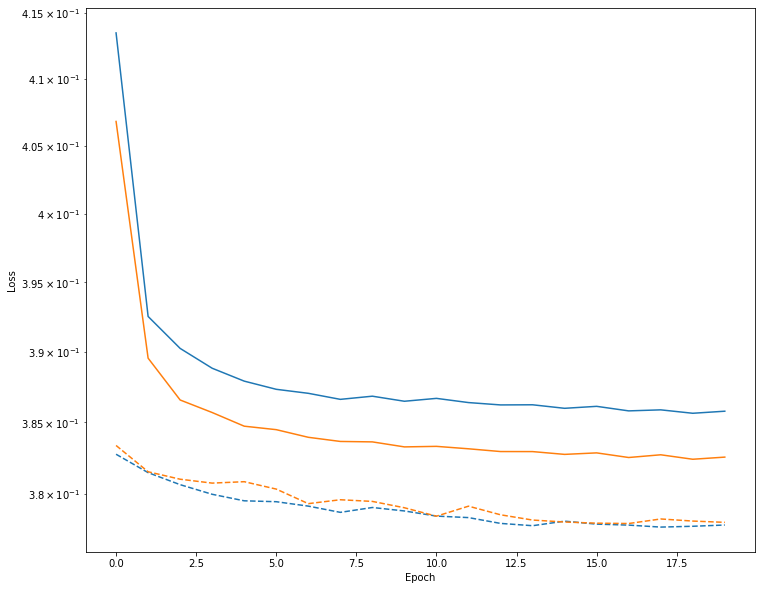

In [ ]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [ ]:
model = make_model(output_bias=initial_bias)
model.load_weights(initial_weights)
baseline_history = model.fit(
    X_train_scaled_encoded,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val_scaled_encoded, y_val))

Epoch 1/100
1810/1810 [==============================] - 19s 9ms/step - loss: 0.4071 - acc: 0.0000e+00 - tp: 889663.0000 - fp: 172658.0000 - tn: 84625.0000 - fn: 11282.0000 - accuracy: 0.8412 - precision: 0.8375 - recall: 0.9875 - auc: 0.7737 - prc: 0.8972 - val_loss: 0.3830 - val_acc: 0.0000e+00 - val_tp: 178540.0000 - val_fp: 33402.0000 - val_tn: 18055.0000 - val_fn: 1649.0000 - val_accuracy: 0.8487 - val_precision: 0.8424 - val_recall: 0.9908 - val_auc: 0.7943 - val_prc: 0.9080
Epoch 2/100
1810/1810 [==============================] - 13s 7ms/step - loss: 0.3918 - acc: 0.0000e+00 - tp: 711374.0000 - fp: 134978.0000 - tn: 70848.0000 - fn: 9382.0000 - accuracy: 0.8442 - precision: 0.8405 - recall: 0.9870 - auc: 0.7846 - prc: 0.9034 - val_loss: 0.3816 - val_acc: 0.0000e+00 - val_tp: 178417.0000 - val_fp: 33097.0000 - val_tn: 18360.0000 - val_fn: 1772.0000 - val_accuracy: 0.8495 - val_precision: 0.8435 - val_recall: 0.9902 - val_auc: 0.7954 - val_prc: 0.9087
Epoch 3/100
1810/1810 [======

In [ ]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()



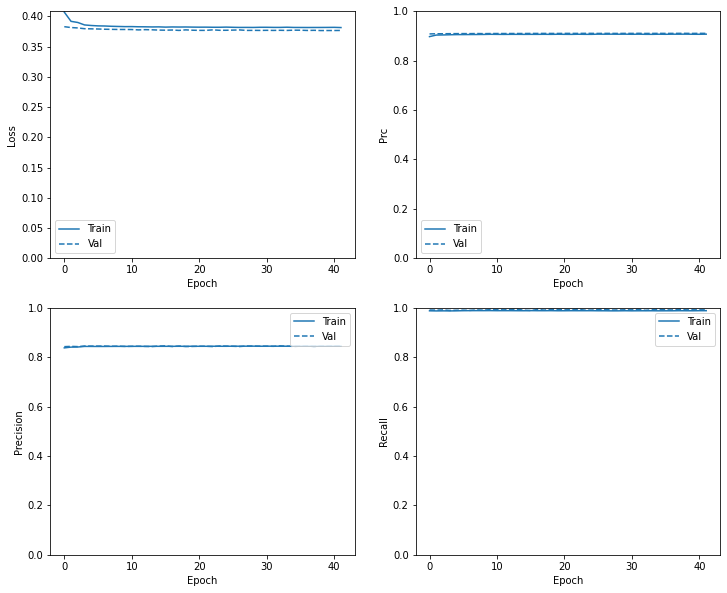

In [ ]:
plot_metrics(baseline_history)


In [ ]:
train_predictions_baseline = model.predict(X_train_scaled_encoded, batch_size=BATCH_SIZE)
y_pred_val = model.predict(X_val_scaled_encoded, batch_size=BATCH_SIZE)

453/453 [==============================] - 1s 1ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

In [ ]:
y_pred_val = [each[0] for each in y_pred_val.tolist()]

loss :  0.37683311104774475
acc :  0.0
tp :  178866.0
fp :  33120.0
tn :  18337.0
fn :  1323.0
accuracy :  0.8513119220733643
precision :  0.8437632918357849
recall :  0.9926577210426331
auc :  0.7998933792114258
prc :  0.9104645252227783

Legitimate Transactions Detected (True Negatives):  18337
Legitimate Transactions Incorrectly Detected (False Positives):  33120
Fraudulent Transactions Missed (False Negatives):  1323
Fraudulent Transactions Detected (True Positives):  178866
Total Fraudulent Transactions:  180189


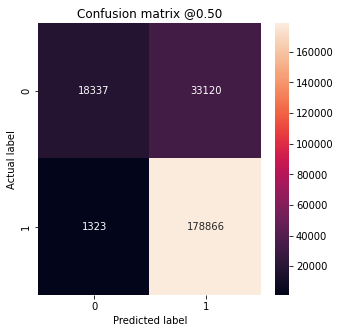

In [ ]:
baseline_results = model.evaluate(X_val_scaled_encoded, y_val,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_val, np.array([1 if each>0.5 else 0 for each in y_pred_val]))

In [ ]:
print(classification_report(y_val, np.array([1 if each>0.5 else 0 for each in y_pred_val])))

In [ ]:
print(classification_report(y_val, np.array([1 if each>0.5 else 0 for each in y_pred_val])))

              precision    recall  f1-score   support

           0       0.93      0.36      0.52     51457
           1       0.84      0.99      0.91    180189

    accuracy                           0.85    231646
   macro avg       0.89      0.67      0.71    231646
weighted avg       0.86      0.85      0.82    231646



In [ ]:
val_pred_df = pd.DataFrame()
val_pred_df["UniqueID"] = val_ids
val_pred_df["count"] = val_cnt
val_pred_df["%Attended"] = val_att
val_pred_df["event_name_count"] = val_event_cnt
val_pred_df["class_name"] = val_df["class_name"].values
val_pred_df["model_preds"] = y_pred_val

In [ ]:
val_pred_df.head()

,UniqueID,count,%Attended,event_name_count,class_name,model_preds
0,CLT21HOU-101-10-13,144.0,72.222222,18.0,OPEN,0.862221
1,CLT21HOU-101-10-14,144.0,72.222222,18.0,OPEN,0.862221
2,CLT21HOU-101-10-17,43.0,95.348837,18.0,OPEN,0.755342
3,CLT21HOU-101-10-5,204.0,93.627451,18.0,OPEN,0.908942
4,CLT21HOU-101-10-6,54.0,79.629630,18.0,OPEN,0.862443


In [ ]:
val_pred_df["model_preds"].describe()

count    2.316460e+05
mean     7.804840e-01
std      2.337956e-01
min      2.818801e-12
25%      7.867743e-01
50%      8.704611e-01
75%      9.022653e-01
max      9.688056e-01
Name: model_preds, dtype: float64

In [ ]:
val_pred_df.to_csv("/content/drive/MyDrive/Crossroads/Ensemble_Model/saved_preds/Ayan_NN_v1.0_TE_val_preds.csv", index=False)

In [ ]:
test_preds = model.predict(X_test_scaled_encoded, batch_size=BATCH_SIZE)
test_preds = np.array([each[0] for each in test_preds])

252/252 [==============================] - 0s 1ms/step


In [ ]:
test_preds_2 = [1 if each>0.5 else 0 for each in test_preds]

In [ ]:
len(test_preds_2) - sum(test_preds_2), len(test_preds_2)

(6716, 128688)

In [ ]:
def get_heuristic_pred(row):
  if ((row['%Attended']<50) & (row['count']>=10) & (row["event_name_count"]>2)) or \
  (row["class_name"] in ['DIST-7HOLD','DIST-EXCP','DIST-WIP','KILL SEATS','OB2','OWNERSHIP','SINGLE GAME SRO','XTEST']):
    return 0
  else:
    return row["model_preds"]

In [ ]:
pred_df = pd.DataFrame()
pred_df["UniqueID"] = test_ids
pred_df["acct_id_aa"] = ["AA"+str(each) for each in test_ids.tolist()]
pred_df["count"] = test_cnt
pred_df["%Attended"] = test_att
pred_df["event_name_count"] = test_event_cnt
pred_df["class_name"] = test_df["class_name"].values
pred_df["model_preds"] = test_preds

In [ ]:
# pred_df["heuristic_pred"] = pred_df.apply(lambda x: get_heuristic_pred(x), 1)

In [ ]:
pred_df.head()

,UniqueID,acct_id_aa,count,%Attended,event_name_count,class_name,model_preds
0,CLT21LV-101-10-1,AACLT21LV-101-10-1,54.0,94.444444,18.0,OPEN,0.913725
1,CLT21LV-101-10-10,AACLT21LV-101-10-10,72.0,70.833333,18.0,OPEN,0.914444
2,CLT21LV-101-10-11,AACLT21LV-101-10-11,72.0,70.833333,18.0,OPEN,0.914444
3,CLT21LV-101-10-12,AACLT21LV-101-10-12,18.0,83.333333,18.0,OPEN,0.916711
4,CLT21LV-101-10-13,AACLT21LV-101-10-13,144.0,72.222222,18.0,OPEN,0.912708


In [ ]:
pred_df.to_csv("/content/drive/MyDrive/Crossroads/Ensemble_Model/saved_preds/Ayan_NN_v1.0_TE_test_preds.csv", index=False)

In [ ]:
pred_df["model_preds"].describe()

count    1.286880e+05
mean     8.354418e-01
std      1.985168e-01
min      1.598067e-09
25%      8.514189e-01
50%      8.901773e-01
75%      9.007038e-01
max      9.517524e-01
Name: model_preds, dtype: float64